In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Heart_Disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
null_per = df.isnull().mean() * 100
print(null_per)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


In [6]:
float_cols = df.select_dtypes(include=['float']).columns
for col in float_cols:
   median_value = df[col].median()  
   df[col].fillna(median_value, inplace=True)  

In [7]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 10:  
        print(f"Column: {col}")
        
        print(unique_values)
        print("-" * 40)

Column: male
[1 0]
----------------------------------------
Column: education
[4. 2. 1. 3.]
----------------------------------------
Column: currentSmoker
[0 1]
----------------------------------------
Column: BPMeds
[0. 1.]
----------------------------------------
Column: prevalentStroke
[0 1]
----------------------------------------
Column: prevalentHyp
[0 1]
----------------------------------------
Column: diabetes
[0 1]
----------------------------------------
Column: TenYearCHD
[0 1]
----------------------------------------


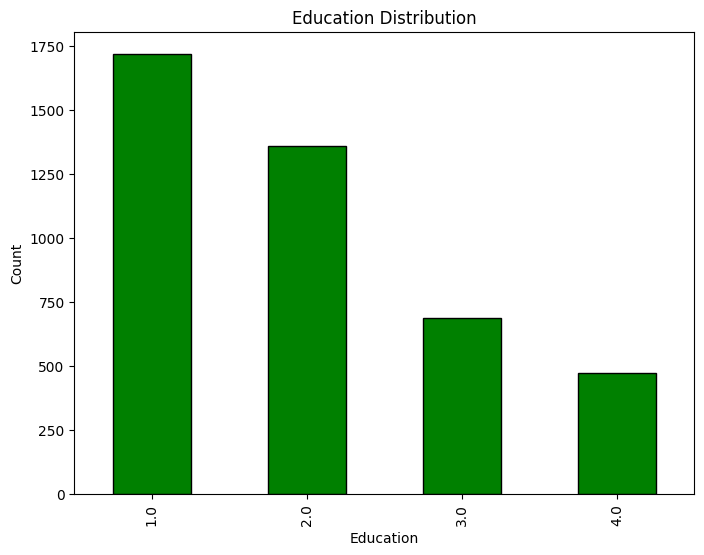

In [9]:
plt.figure(figsize = (8,6))
pclass_count = df["education"].value_counts()
pclass_count.plot(kind = 'bar', color = 'green', edgecolor = 'black') 
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

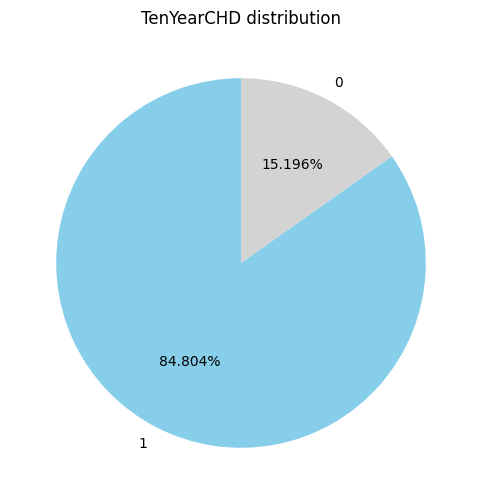

In [10]:
plt.figure(figsize = (8,6))
s_count = df["TenYearCHD"].value_counts()
name = ['1', '0']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['skyblue','lightgrey'])
plt.title("TenYearCHD distribution")
plt.show()

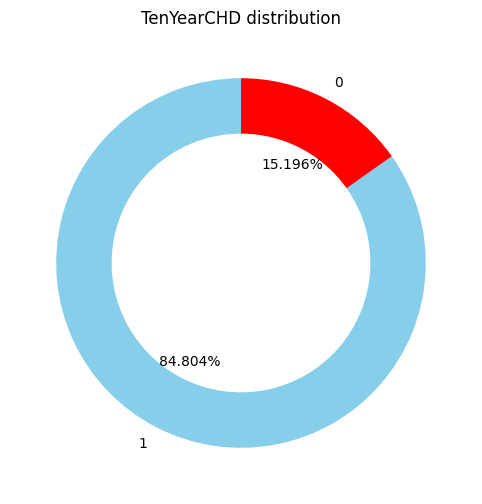

In [11]:
plt.figure(figsize = (8,6))
s_count = df["TenYearCHD"].value_counts()
name = ['1', '0']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['skyblue','red'], wedgeprops=dict(width=0.3))
plt.title("TenYearCHD distribution")
plt.show()

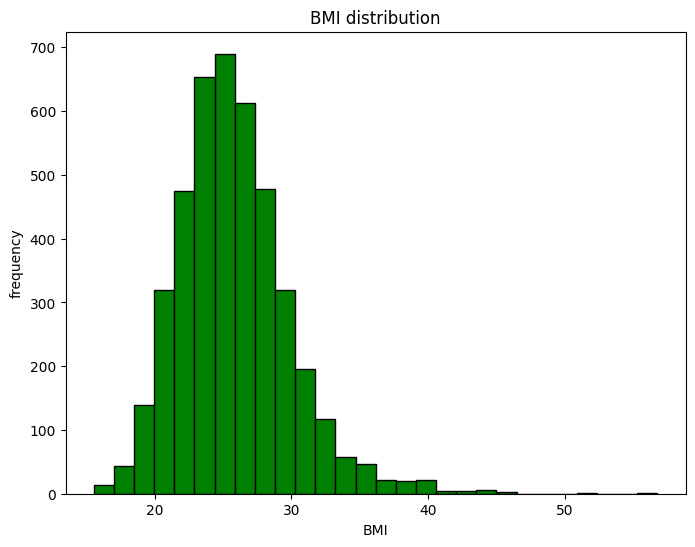

In [12]:
plt.figure(figsize = (8,6))
plt.hist(df['BMI'], bins = 28, color = 'green', edgecolor = 'black') #bins -> interval gap
plt.title('BMI distribution')
plt.xlabel('BMI')
plt.ylabel('frequency')
plt.show()

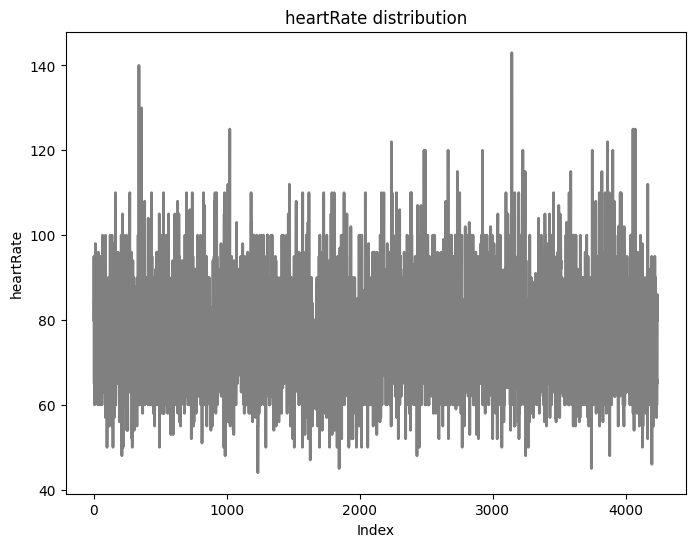

In [14]:
plt.figure(figsize = (8,6))
plt.plot(df.index, df['heartRate'], c = 'grey', lw = 2)
# lw -> line width
plt.title('heartRate distribution')
plt.xlabel('Index')
plt.ylabel('heartRate')
plt.show()

<Figure size 800x600 with 0 Axes>

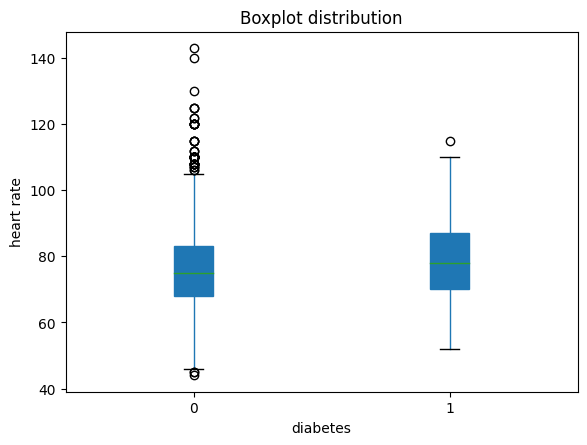

In [15]:
plt.figure(figsize = (8,6))
df.boxplot(column = 'heartRate', by = 'diabetes', grid = False, patch_artist = True)
# patch_artist -> to fill the boxplot with color
plt.suptitle('')
plt.title('Boxplot distribution')
plt.xlabel('diabetes')
plt.ylabel('heart rate')
plt.show()
# Higer viscus, lower viscus, median(greenline), outliers

In [16]:
X = df.drop('TenYearCHD', axis=1)  
y = df['TenYearCHD']  

In [17]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [18]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
log_reg = LogisticRegression(max_iter=6000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=6000)

In [21]:
y_pred = log_reg.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy} \n")
print(" \nConfusion Matrix: ")
print(conf_matrix)
print("\nClassification Report: ")
print(class_report)

Accuracy: 0.8584905660377359 

 
Confusion Matrix: 
[[718   6]
 [114  10]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.62      0.08      0.14       124

    accuracy                           0.86       848
   macro avg       0.74      0.54      0.53       848
weighted avg       0.83      0.86      0.81       848

